In [1]:
# data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
plt.style.use('fivethirtyeight')

# modeling
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/SEAS 6402 Project/Data/CSV/less_close_label/non_text_feature.csv')

In [4]:
df

,business_id,stars,review_count,is_chain,cat_Pizza,cat_Mexican,cat_Chinese,cat_Italian,cat_American (Traditional),cat_Thai,cat_Vietnamese,cat_Indian,cat_Breakfast & Brunch,cat_FastFood,user_count,checkin_count,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsDelivery,GoodForKids,OutdoorSeating,RestaurantsAttire,HasTV,BikeParking,Alcohol,WiFi,NoiseLevel,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_touristy,Ambience_trendy,Ambience_casual,Ambience_upscale,Ambience_hipster,Ambience_divey,per capita personal income (dollars),is_open2020
0,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,0,0,0,1,0,0,0,0,0,0,0,5.0,455.0,1.0,2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,37400,1.0
1,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,0,0,0,0,0,0,0,0,0,0,0,7.0,721.0,1.0,2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60804,1.0
2,1Dfx3zM-rW4n-31KeC8sJg,3.0,18,1,0,1,0,0,0,0,0,0,1,1,1.0,90.0,1.0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47606,1.0
3,fweCYi8FmbJXHCqLnwuk8w,4.0,16,1,1,0,0,1,0,0,0,0,0,0,2.0,5.0,1.0,2,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69949,1.0
4,1RHY4K3BD22FK7Cfftn8Mg,4.0,35,0,0,0,0,0,0,0,0,0,0,1,2.0,21.0,1.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63371,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29673,Wyc49dq1r5uMqBl9bHVPAw,2.5,24,1,0,0,0,0,0,0,0,0,1,1,0.0,51.0,1.0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,35696,1.0
29674,5xX1Eb4fBoUr53OJkgRHRQ,2.0,121,0,1,0,0,0,0,0,0,0,0,1,3.0,30.0,1.0,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35696,1.0
29675,RckeGBEPQpGv00ivf6tcgw,4.5,195,0,0,0,0,0,0,0,0,0,1,0,5.0,469.0,1.0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47606,1.0
29676,AE80fzfVnsyeHiiVhwSGMw,2.5,93,0,0,0,0,0,0,0,0,0,0,1,0.0,169.0,1.0,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47606,1.0


In [5]:
df.isnull().sum().any()

False

In [13]:
cols = ['stars',	'review_count',	'is_chain',	'cat_Pizza',	'cat_Mexican',	'cat_Chinese',	'cat_Italian',	'cat_American (Traditional)',	'cat_Thai',	'cat_Vietnamese',	'cat_Indian',	
        'cat_Breakfast & Brunch',	'cat_FastFood',	'user_count',	'checkin_count','per capita personal income (dollars)']

In [14]:
X = df[cols]
y = df['is_open2020']

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
df_minmax_scaled = pd.DataFrame(X_minmax)
df_minmax_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.375,0.014979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024038,0.009809,0.318031
1,0.750,0.020012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033654,0.015544,0.651897
2,0.500,0.001797,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.004808,0.001940,0.463623
3,0.750,0.001558,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009615,0.000108,0.782354
4,0.750,0.003835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.009615,0.000453,0.688516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29673,0.375,0.002516,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.001100,0.293723
29674,0.250,0.014140,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.014423,0.000647,0.293723
29675,0.875,0.023008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.024038,0.010111,0.463623
29676,0.375,0.010785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.003643,0.463623


In [36]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 645)

In [37]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(train_X, train_y)

In [38]:
X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)
test_X = pd.DataFrame(test_X)
test_y = pd.DataFrame(test_y)

In [39]:
L = [0.000000000001,0.00000000001,0.0000000001,0.000000001,
     0.00000001,0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
accuracy = {}
for i in L:
    LR = LogisticRegression(C=i)
    LR.fit(X_res,y_res)
    pred_y = LR.predict(test_X)
    
    accuracy[i] = 100*accuracy_score(test_y,pred_y)

In [40]:
accuracy

{1e-12: 6.963162623539983,
 1e-11: 7.446091644204851,
 1e-10: 11.713836477987421,
 1e-09: 17.666217430368373,
 1e-08: 24.12398921832884,
 1e-07: 26.71832884097035,
 1e-06: 27.21248876909254,
 1e-05: 37.7470799640611,
 0.0001: 52.7403414195867,
 0.001: 54.132973944294704,
 0.01: 55.15498652291105,
 0.1: 63.20754716981132,
 1: 55.3796046720575}

Text(0, 0.5, 'Accuracy')

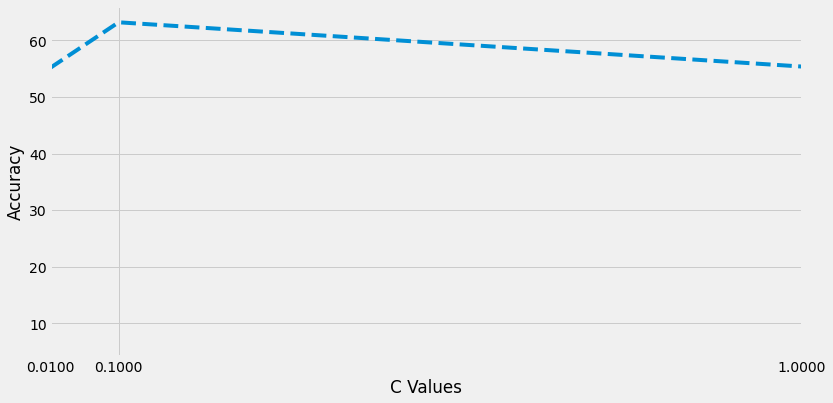

In [41]:
plt.figure(figsize=(12,6))
plt.plot( list(accuracy.keys()), list(accuracy.values()), '--')
plt.xticks(list(accuracy.keys()))
plt.xlim(0.01,1)
plt.xlabel("C Values")
plt.ylabel("Accuracy")

In [42]:
LR = LogisticRegression(C=0.1)
LR.fit(X_res,y_res)
pred_y = LR.predict(test_X)

In [43]:
confusion_matrix(test_y,pred_y)

array([[ 223,  397],
       [2879, 5405]])

In [44]:
accuracy_score(test_y,pred_y)

0.6320754716981132